## **演练0601：图像卷积操作**

### **二维卷积操作**
* 计算过程  
设某灰度图片X有(H,W)像素(例如9x9)，每个像素值在0~255之间。现在使用一个HHxWW矩阵W(例如3x3)与该图片进行卷积操作。矩阵W称为卷积核，有时候也被称为Filter  
    1. 将W的左上角点元素与X中的坐上角点元素对齐  
![](../images/160101.png)  
    2. W分别与图片中的HHxWW区块进行"点积和"操作，然后作为左上角点元素放入到卷积结果矩阵R中。在本例中，R维度为(7, 7)  
![](../images/160102.png)  
    3. 将W向右移动一个元素，与X的第1行第2个元素对齐，使用点积和计算R中的第2个结果元素。依次类推，直到与X最右边3x3区域重叠  
![](../images/160103.png)  
    4. W向下移动一个元素，再次从左向右与X中的各个3x3区域进行点积和操作，直到X最右下角的3x3区域  
![](../images/160104.png)  
* 图像及卷积核大小的选取
 * 一般情况下，图像应为方阵，即H=W
 * 一般情况下，HH和WW取相同的数
 * 当卷积核覆盖的区域已经超出了图像区域时，一般不再计算
* 计算卷积结果矩阵的大小
 * 步长(stride)：卷积核每次水平/垂直移动的元素个数。例如，stride=1，表示每次移动1个元素
 * 补全(pad)：在X的外围填补的行或列数。填补行或列的目的一般是为了使产生的结果矩阵具有特定的维度。填补行或列时，补入的元素一般赋值为0。
 * 输出结果矩阵大小计算公式
    * 垂直方向：OH = (H + pad*2 -HH)/stride +1
    * 水平方向：OW = (W + pad*2 -WW)/stride +1
 * 例如，9x9的图像，使用3x3的卷积核
    * stride=1，pad=0，此时输出的矩阵大小为：7x7
    * stride=2，pad=0，此时输出的矩阵大小为：4x4
    * 9x9的图像，使用3x3卷积核，stride=1，pad=1，此时输出的矩阵大小为：9x9
    * 9x9的图像，使用3x3卷积核，stride=1，pad=2，此时输出的矩阵大小为：11x11  
![](../images/160105.png)

### **三维卷积运算**
* 如果图片有RGB三个颜色通道，那么图片X构成(3, H, W)三维矩阵。此时卷积核W大小必须是(3, HH ,WW)。
* 在计算点积和时，是两个三维矩阵之间计算。例如，第一个卷积的计算结果为：  
$ \begin{aligned}
r_{11}=&x_{111} w_{111}+x_{112} w_{112}+x_{113} w_{113}+x_{121} w_{121}+x_{122} w_{122}+x_{123} w_{123}+x_{131} w_{131}+x_{132} w_{132}+x_{133} w_{133}+
 \\
& x_{211} w_{211}+x_{212} w_{212}+x_{213} w_{213}+x_{221} w_{221}+x_{222} w_{222}+x_{223} w_{223}+x_{231} w_{231}+x_{232} w_{232}+x_{233} w_{233}+
 \\
& x_{311} w_{311}+x_{312} w_{312}+x_{313} w_{313}+x_{321} w_{321}+x_{322} w_{322}+x_{323} w_{323}+x_{331} w_{331}+x_{332} w_{332}+x_{333} w_{333} \end{aligned}$  
![](../images/160106.png)  
* 输出的卷积结果矩阵R仍为二维矩阵，它不再包含3个颜色通道。可以视为，这个卷积操作将3个颜色通道整合到了1个颜色通道中  
![](../images/160107.png)

### **使用多个卷积核**
* 针对一张图片，可以使用多个卷积核对其进行卷积运算。
* 因为每个卷积核对图片的卷积运算都会产生一个二维矩阵，故而多个卷积核的运算会产生多个二维矩阵，从而构成一个三维矩阵
* 采用下列表达式表示进行三维卷积运算的多个卷积核：W(F, C, HH, WW)。其中，F表示卷积核(Filter)的数量，C表示颜色通道数量，HH表示卷积核垂直方向元素数，WW表示卷积核水平方向元素数
* 每个卷积核的参数值是不同的。例如，采用(6, 3, 5, 5)形式的多个卷积核，就有6x3x5x5=450个卷积核的权重参数需要优化计算。  
![](../images/160108.png)

### **案例1：使用卷积实现图像的平滑(模糊)处理**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  app.launch_new_instance()


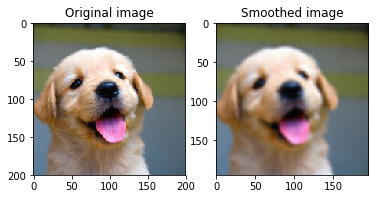

In [1]:
''' 一个使用卷积计算来对图像进行平滑(模糊)处理的例子 '''
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
# 要使用imread,imresize，请确保安装了pillow库：pip install pillow
# 请注意，在scipy 1.3.0及以上版本中，已经移除了imread等
# 所以需要卸载掉高版本的scipy，安装低版本，例如：pip install scipy=1.2.1
from scipy.misc import imread, imresize

# 将图片读入到内存矩阵中，按照(H, W, C)顺序
puppy = imread('puppy.jpg')

# 尺寸统一缩放到(200, 200)
img_size = 200
x = np.zeros((3, img_size, img_size), dtype=puppy.dtype)        # 3(个颜色通道)x高度x宽度
# 先将puppy的H和W转为img_size大小，然后转为(C,H,W)顺序保存
x[:, :, :] = imresize(puppy, (img_size, img_size)).transpose((2, 0, 1))  

# 设置卷积核
HH = WW = 5                 # 调整该值，可以获得不同模糊度效果
w = np.ones((HH,WW))

# 定义卷积结果，仍然保持三个颜色通道
# 在本例中，为避免卷积运算时卷积核有可能超出图像边界，对于右侧及下方HH/WW个像素不予进行卷积处理
out = np.zeros((3, img_size - HH, img_size - WW), dtype=puppy.dtype)

for c in range(x.shape[0]):             # 每个颜色通道分别处理
    for i in range(img_size - HH):      # 竖直方向，最下方的WW个像素不予处理(卷积核超出了图像边界)
        for j in range(img_size - WW):   # 水平方向，最右侧的WW个像素不予处理(卷积核超出了图像边界)
            x_section = x[c, i:i+HH, j:j+WW]   # 待卷积的x区域。注意x中第2个维度是H，第3个维度是W
            # 卷积后取平均值作为新的像素值
            out[c, i, j] = np.sum(x_section * w) // (HH * WW)   # x_section * w将对两个矩阵进行对应元素乘积操作

# 将x和out从(C,H,W)顺序转为能显示的(H, W, C)顺序
x = x.transpose((1, 2, 0))
out = out.transpose((1, 2, 0))

# 显示原始图片及平滑处理之后的图片
plt.subplot(1, 2, 1)
plt.title('Original image')
plt.imshow(x)
plt.subplot(1, 2, 2)
plt.title('Smoothed image')
plt.imshow(out)
plt.show()

### **案例2：使用卷积计算实现图像的灰度，以及进行边缘检测**

> **步骤1：定义卷积操作的前向计算方法**

In [2]:
''' 卷积操作前向计算的最简单实现 '''

def conv_forward_naive(x, w, b, conv_param):
    """
    卷积前向计算操作的最原始实现

    输入参数：
    x: (N, C, H, W)，待卷积运算的图片数据，有N张图片样本
    w: (F, C, HH, WW)，卷积权重矩阵，每个矩阵有F个filter，每个Filter包含C个颜色通道，宽HH，高WW
    b: (F,)，偏置项
    conv_param: dictionary，包含下列Key:
        'stride': 水平及垂直方向上卷积移动步长
        'pad': 水平及垂直方向上要补齐的元素数
    返回值：
    out: (N, F, H', W')，其中H'和W'分别是：
        H' = 1 + (H + 2 * pad - HH) / stride
        W' = 1 + (W + 2 * pad - WW) / stride
    cache: (x, w, b, conv_param)
    """
    (N, C, H, W) = x.shape
    (F, _, HH, WW) = w.shape
    stride = conv_param['stride']
    pad = conv_param['pad']
    # 根据stride及pad计算水平和垂直方向上的卷积计算结果数量
    H_prime = int(1 + (H + 2 * pad - HH) / stride)
    W_prime = int(1 + (W + 2 * pad - WW) / stride)
    out = np.zeros((N, F, H_prime, W_prime))

    for n in range(N):
        # 在原始图片矩阵上(不包括颜色通道维度)补齐
        x_pad = np.pad(x[n,:,:,:], ((0,0),(pad,pad),(pad,pad)), 'constant')
        for f in range(F):
            for h_prime in range(H_prime):
                for w_prime in range(W_prime):
                    h1 = h_prime * stride           # 水平方向起点索引
                    h2 = h_prime * stride + HH      # 水平方向终点索引
                    w1 = w_prime * stride
                    w2 = w_prime * stride + WW
                    window = x_pad[:, h1:h2, w1:w2] # 选定卷积区域
                    # 计算单个Filter上每个点的卷积
                    out[n, f, h_prime, w_prime] = np.sum(window * w[f,:,:,:]) + b[f]
    cache = (x, w, b, conv_param)
    return out, cache

> **步骤2：对卷积图像进行灰度化处理及检测边缘**

c:\users\iahuo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':
c:\users\iahuo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
c:\users\iahuo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


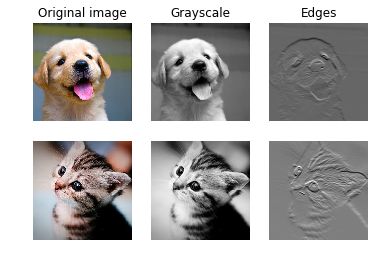

In [7]:
''' 使用卷积对图像进行灰度处理及边缘检测 '''
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread, imresize

# 将图片读入到内存矩阵中(H, W, C)
kitten, puppy = imread('kitten.jpg'), imread('puppy.jpg')
# kitten不是正方形的，下面将其裁剪为正方形
d = kitten.shape[1] - kitten.shape[0]           # 先获得长宽之差
kitten_cropped = kitten[:, d//2:-d//2, :]       # 取W方向居中的元素

# 尺寸统一缩放到(200, 200)
img_size = 200
x = np.zeros((2, 3, img_size, img_size))        # 2(张图片)x3(个颜色通道)x长度x宽度
x[0, :, :, :] = imresize(puppy, (img_size, img_size)).transpose((2, 0, 1))
x[1, :, :, :] = imresize(kitten_cropped, (img_size, img_size)).transpose((2, 0, 1))

# 设置卷积：2(个Filter)x3(颜色通道)x长x宽
w = np.zeros((2, 3, 3, 3))
# 第一个Filter用于进行灰度化操作
# w[0]与x中的每张图片分别进行卷积后，原来图片中的3个颜色通道，被卷积成只有1个颜色通道了，故变成灰度图
w[0, 0, :, :] = [[0, 0, 0], [0, 1, 0], [0, 0, 0]]     # red通道卷积权重
w[0, 1, :, :] = [[0, 0, 0], [0, 1, 0], [0, 0, 0]]     # green通道卷积权重
w[0, 2, :, :] = [[0, 0, 0], [0, 1, 0], [0, 0, 0]]     # blue通道卷积权重

# 第二个Filter用于在green通道上识别边界(也可以选择red或blue通道进行)
# 注意卷积核中的第一行和第三行值正好相反，而第二行值设为0
# 这时卷积出的像素点值就取决于第一行点积和d1和第三行点积和d3哪个更大。第二行点积和为0
# d1和d3的绝对值越接近(它们正负号相反)，说明它们的像素值越连续(不太可能是边界)
# d1和d3的绝对值相差越大，说明它们的像素值差异较大(很可能是边界)，最后卷积结果的绝对值就越大
w[1, 1, :, :] = [[1, 1, 1], [0, 0, 0], [-1, -1, -1]]

# 偏置项针对w设定，每个Filter配备一个偏置值
b = np.array([0, 128])

# 执行卷积运算，x中的每张图片分别要与w进行卷积运算
# x: (2,3,200,200)    w: (2,3,3,3)    out: (2, 2, 200, 200)
# x[0]先与w中的第一个Filter(w[0])进行卷积，得到灰度图out[0, 0]，其维度为：(200, 200)
# x[0]再与w中的第二个Filter(w[1])进行卷积，得到边界图out[0, 1]，其维度为：(200, 200)
# x[1]与w[0]卷积，得到灰度图out[1, 0]；
# x[1]与w[1]卷积，得到边界图out[1, 1]
out, _ = conv_forward_naive(x, w, b, {'stride': 1, 'pad': 1})

def show_single_channel_pic(img, normalize=True):
    """ 显示只有单通道颜色值的图片 
        此时将追加另外两个通道的像素，且像素值与第一个通道相同
        最终就显示为灰度图了
    """
    if normalize:               # 把各像素的取值范围限定在0~255之间
        img_max, img_min = np.max(img), np.min(img)
        img = 255.0 * (img - img_min) / (img_max - img_min)
        img = img.astype('uint8')           # 将元素类型从float转为uint8以便图像显示
    img = np.array([img, img, img])         # 使用一个通道的值填充三个颜色通道
    img = img.transpose((1,2,0))            # 转成(H,W,C)顺序
    plt.gca().axis('off')
    plt.imshow(img)
    
# 显示原始图片及卷积操作之后的图片
plt.subplot(2, 3, 1)
plt.gca().axis('off')
plt.title('Original image')
plt.imshow(puppy)
plt.subplot(2, 3, 2)
plt.title('Grayscale')
show_single_channel_pic(out[0, 0], normalize=True)
plt.subplot(2, 3, 3)
plt.title('Edges')
show_single_channel_pic(out[0, 1], normalize=True)
plt.subplot(2, 3, 4)
plt.gca().axis('off')
plt.imshow(kitten_cropped)
plt.subplot(2, 3, 5)
show_single_channel_pic(out[1, 0], normalize=True)
plt.subplot(2, 3, 6)
show_single_channel_pic(out[1, 1], normalize=True)
plt.show()